## 18_03 Paint a boolean matrix

Implement a routine that takes an n x m Boolean array A together with an entry (x, y) and flips the color of the region associated with (x, y).

### Hint: 

Solve this conceptually, then think about implementation optimizations.


### Initial Remarks

I want to create a solution that works quickly and doesn't suffer from large execution times 

In [21]:
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib
from collections import deque

MASK_VAL = -1
ROWS, COLS = 7, 10
TARGET_LABEL = "Target"

#Make a repeatably pseudo-random boolean matrix of ROWS x COLS
np.random.seed(seed=43) # Life the universe and everything
master_matrix = np.random.randint(2, size=(ROWS, COLS))
# master_matrix = np.zeros((ROWS, COLS), dtype=int)


def solution(my_matrix, my_point):
    """Paints a boolean matrix at my_point and along all adjacent points to the opposite color"""
    original_matrix = my_matrix.copy()
    
    def get_adjacent_same(a_point, a_matrix):
        """Returns points that are both adjacent to the given point and are the same value"""
        # val = a_matrix[a_point]
        max_x, max_y = a_matrix.shape
        x, y = a_point[:]

        points = ((x, y), (x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1))
        result = []
        for _x, _y in points:
            if (0 <= _x < max_x) and (0 <= _y < max_y):
                if a_matrix[(_x,_y)] == val:
                    new_point = (_x, _y)
                    result.append(new_point)
                    my_matrix[new_point] ^= 1

        return result

    def show_plot(plots):
        """Visualizes our solution"""
        _, axarr = plt.subplots(1,len(plots))
        for i in range(len(plots)):
            data = plots[i][1]
            cmap = matplotlib.cm.spring
            axarr[i].set_title(plots[i][0])
            axarr[i].set_yticklabels([])
            axarr[i].set_xticklabels([])
            if plots[i][0] == TARGET_LABEL:
                axarr[i].set_title(str(my_point))
                cmap.set_bad(color='white')
                masked_array = np.ma.masked_where(data == MASK_VAL, data)
                axarr[i].imshow(masked_array, cmap='flag')
            else:
                axarr[i].imshow(data, cmap='flag')               
            axarr[i].tick_params(axis='both', which='both', bottom=False, top=False,
                 left=False, labelbottom=False)

        plt.show()
        plt.close()

    # Start with just the main point
    same_color_points = deque([my_point])
    val = original_matrix[my_point]
    
    # Create a masked field for the solution plot display, so that it can be white
    solution = np.arange(ROWS * COLS).reshape((ROWS, COLS))
    solution.fill(MASK_VAL)
    
    # Flip everything 
    %%timeit
    while same_color_points:
        a_point = same_color_points.popleft()
        same_color_points.extend(get_adjacent_same(a_point, my_matrix))
        solution[a_point] = val
        # show_plot([("Original", original_matrix), (TARGET_LABEL, solution), ("Repaint", my_matrix)])
        
    # Highlight the provided point in the original problem in the solution plot
    solution[my_point] = 1 - val
    plt.rcParams["figure.figsize"] = [10, 10] 
    show_plot([("Original", original_matrix), (TARGET_LABEL, solution), ("Repaint", my_matrix)])

    

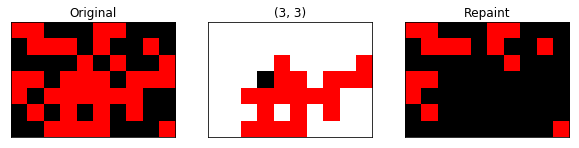

In [24]:
solution(master_matrix.copy(), (3, 3))

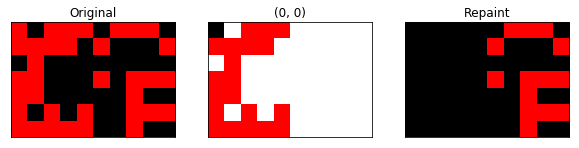

In [3]:
solution(master_matrix.copy(), (0, 0))

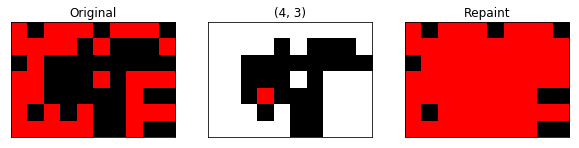

In [4]:
solution(master_matrix.copy(), (4, 3))

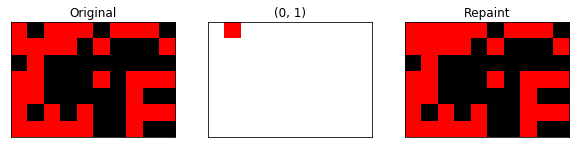

In [5]:
solution(master_matrix.copy(), (0, 1))